<a href="https://colab.research.google.com/github/Spontyrupple/mamaine/blob/main/King_County.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Where Do We Need to Focus? Mapping PK-12 Student Success in King County**

###**Introduction**

On September 14 2023, the KUOW website reported that 50% of Washington students were reading below their grade level. Education stakeholders at different levels, for example Washington's Superintendent of Public Instructuon in Washington, have expressed the need for several approaches to improve student success in Washington. This spatial analysis investigates gaps in educational outcomes for Pre-K through 12 students in King County to establish where the need for more targeted intervention is. In its efforts to improve student success, King county through programs such as Best Start for Kids, works to mitigate the impact socio-economic issues have on student acheivement. With focus on two socio-economic factors, namely, poverty levels, and homelesness, the study reviews student success in King County and the efforts being done to improve it. Specifically, this study reviews how the 1003 funds, also known as the School Improvement Fund are allocated. According to the US department of Education, these funds are for schools, local educational agencies (LEAs), and state educational agencies (SEAs) to improve student achievement.

The analysis shows that Tukwila School District needs targeted interventions the most. The district is the most impacted by poverty and homelessness amongst its student population and has the highest drop out rate. However, the school district did not receive 1003 Funds in the 2022/23 academic year.

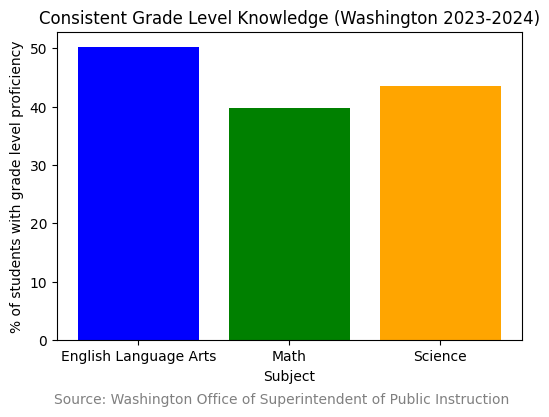

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for school enrolment and percentages
data = {
    'Subject': ['English Language Arts', 'Math', 'Science'],
    'Percentage': [50.3, 39.7, 43.5]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot histogram (bar plot)
plt.figure(figsize=(6, 4))
plt.bar(df['Subject'], df['Percentage'], color=['blue', 'green', 'orange'])

# Add labels and title
plt.xlabel('Subject')
plt.ylabel('% of students with grade level proficiency')
plt.title('Consistent Grade Level Knowledge (Washington 2023-2024)')

# Add data source note
plt.figtext(0.5, -0.05, 'Source: Washington Office of Superintendent of Public Instruction',
            ha='center', fontsize=10, color='gray')

# Show the plot
plt.show()


According to the Office of Superintendent of Public Instruction of Washington (OSPI), 1,100,059 students were enroled for the 2023-2024 academic year in Washington State. As shown in the figure above, half of enrolled students are performing at the grade-level proficiency in English Language Arts and less than half of enroled students are perfoming at the grade level proficiency in Mathematics, and Science. Proficiency rates are represented as percentages of total enrolled students.

In [ ]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify

In [ ]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [ ]:
#!python --version
gpd.__version__

'1.0.1'

In [ ]:
! wget -q -O WA_County_Boundaries.zip https://github.com/Spontyrupple/mamaine/raw/refs/heads/main/WA_County_Boundaries.zip

zip_ref = zipfile.ZipFile('WA_County_Boundaries.zip', 'r') # use correct zip file name 'kingcounty.zip'
zip_ref.extractall()
zip_ref.close()
wac = gpd.read_file('WA_County_Boundaries.shp') #load the shapefile with gpd as wac, remove '.zip'

# The following line was causing the IndentationError.
# It has been unindented to be at the same level as other shell commands.
! wget -q -O kingcounty.zip https://docs.google.com/uc?id=1oZr6tGskrK9bh1Fcnr7YR4CGurSMcOAT&export=download

zip_ref = zipfile.ZipFile('kingcounty.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
county=gpd.read_file('School_Districts_in_King_County___schdst_area.shp') #load the shapefile with gpd as njC

<Axes: >

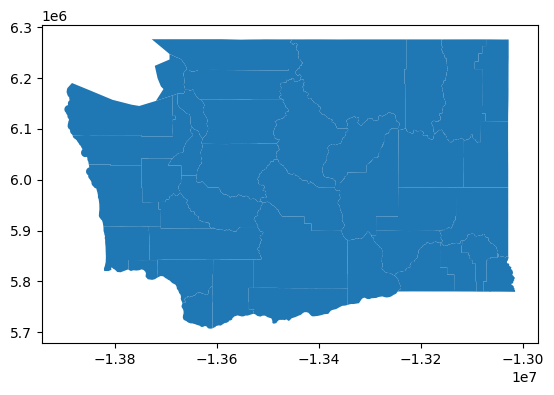

In [ ]:
wac.plot()

In [ ]:
!pip install pandas
import pandas as pd

doewa=pd.read_csv('https://github.com/Spontyrupple/mamaine/raw/refs/heads/main/DOrateWA.csv')

In [ ]:
doewa['JURISDIC_3']=doewa ['Geo_QName'].str.replace(', Washington','')

In [ ]:
wac1 = pd.merge(wac, doewa, on='JURISDIC_3',how='outer',indicator=True)
wac1[['JURISDIC_3','SE_A12004_002','SE_A12004_003','SE_A12003_002','SE_A12003_003','_merge']]


,JURISDIC_3,SE_A12004_002,SE_A12004_003,SE_A12003_002,SE_A12003_003,_merge
0,Adams County,6133,13246,104,1240,both
1,Asotin County,4221,17550,260,714,both
2,Benton County,53279,146252,695,10684,both
3,Chelan County,17955,58509,128,3523,both
4,Clallam County,12434,63259,125,2777,both
5,Clark County,116658,370836,1220,23941,both
6,Columbia County,693,3173,0,54,both
7,Cowlitz County,23538,83743,267,5054,both
8,Douglas County,10232,31579,82,2293,both
9,Ferry County,1151,5934,26,274,both


<Axes: >

Text(0.5, 1.0, 'Enrolled in School Age 3-up')

[]

[]

<Axes: title={'center': 'Enrolled in School Age 3-up'}>

<Axes: >

Text(0.5, 1.0, 'Not Enrolled in School Age 3-up')

[]

[]

<Axes: title={'center': 'Not Enrolled in School Age 3-up'}>

<Axes: >

Text(0.5, 1.0, 'Not high school grad/dropped out (16-19 year-olds)')

[]

[]

<Axes: title={'center': 'Not high school grad/dropped out (16-19 year-olds)'}>

<Axes: >

Text(0.5, 1.0, 'High school grad/enrolled (16-19 year olds)')

[]

[]

<Axes: title={'center': 'High school grad/enrolled (16-19 year olds)'}>

Text(0.5, 0.98, 'Washington State Student Population Overview (king County boundaries highlighted white)')

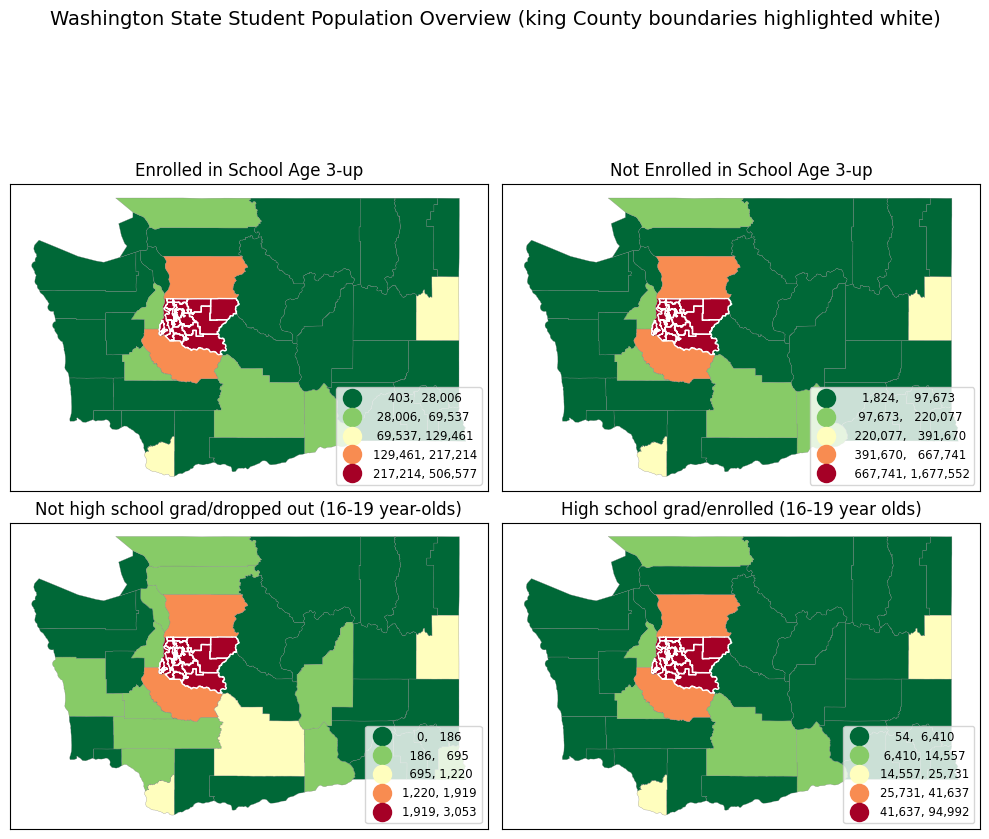

In [ ]:

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharey=True, tight_layout=True)
county=county.to_crs(wac1.crs)

# Top-left subplot
wac1.plot(ax=axs[0, 0], column='SE_A12004_002', legend=True, cmap='RdYlGn_r',
         scheme='natural_breaks', k=5, edgecolor='grey', linewidth=0.2,
         legend_kwds={"fmt": "{:,.0f}", 'loc':'lower right',
                       'title_fontsize':'medium', 'fontsize':'small',
                       'markerscale':1.4})
axs[0, 0].set_title("Enrolled in School Age 3-up")
axs[0, 0].set_xticks([]); axs[0, 0].set_yticks([])

county.plot(ax=axs[0, 0], color='none', edgecolor='white')



# Top-right subplot
wac1.plot(ax=axs[0, 1], column='SE_A12004_003', legend=True, cmap='RdYlGn_r',
         scheme='natural_breaks', k=5, edgecolor='grey', linewidth=0.2,
         legend_kwds={"fmt": "{:,.0f}", 'loc':'lower right',
                       'title_fontsize':'medium', 'fontsize':'small',
                       'markerscale':1.4})
axs[0, 1].set_title("Not Enrolled in School Age 3-up")
axs[0, 1].set_xticks([]); axs[0, 1].set_yticks([])

county.plot(ax=axs[0, 1], color='none', edgecolor='white')

# Bottom-left subplot
wac1.plot(ax=axs[1, 0], column='SE_A12003_002', legend=True, cmap='RdYlGn_r',
         scheme='natural_breaks', k=5, edgecolor='grey', linewidth=0.2,
         legend_kwds={"fmt": "{:,.0f}", 'loc':'lower right',
                       'title_fontsize':'medium', 'fontsize':'small',
                       'markerscale':1.4})
axs[1, 0].set_title("Not high school grad/dropped out (16-19 year-olds)")
axs[1, 0].set_xticks([]); axs[1, 0].set_yticks([])

county.plot(ax=axs[1, 0], color='none', edgecolor='white')

# Bottom-right subplot
wac1.plot(ax=axs[1, 1], column='SE_A12003_003', legend=True, cmap='RdYlGn_r',
         scheme='natural_breaks', k=5, edgecolor='grey', linewidth=0.2,
         legend_kwds={"fmt": "{:,.0f}", 'loc':'lower right',
                       'title_fontsize':'medium', 'fontsize':'small',
                       'markerscale':1.4})
axs[1, 1].set_title("High school grad/enrolled (16-19 year olds)")
axs[1, 1].set_xticks([]); axs[1, 1].set_yticks([])

county.plot(ax=axs[1, 1], color='none', edgecolor='white')
fig.suptitle('Washington State Student Population Overview (king County boundaries highlighted white)', fontsize=14)
plt.show()


King County stands out as a county with the biggest number of enrolment for a population aged 3 years and above out of all 39 counties. 1/3 of students in Washington State live in King County.

###How King County compares with other counties.

<Figure size 900x400 with 0 Axes>

(array([ 1.,  0.,  1.,  0.,  1.,  1.,  1., 11., 15.,  8.]),
 array([ 73.3 ,  75.97,  78.64,  81.31,  83.98,  86.65,  89.32,  91.99,
         94.66,  97.33, 100.  ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Percentage')

Text(0, 0.5, 'Frequency (Number of Counties)')

Text(0.5, 1.0, 'Distribution of Graduation and enrolment Rates (Ages 16-19) by County')

Text(0.5, -0.1, 'Source: https://www.socialexplorer.com/tables/ACS2022_5yr')

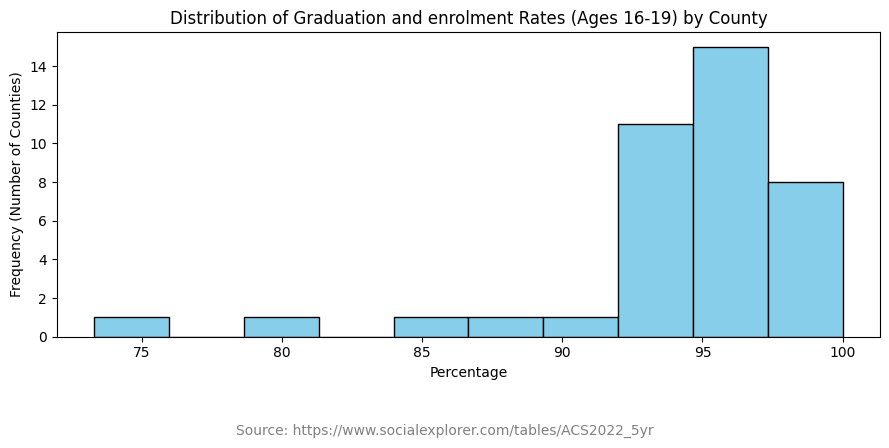

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for counties, population and percentages
data = {
    'County': ['Adams County', 'Asotin County', 'Benton County', 'Chelan County', 'Clallam County', 'Clark County', 'Columbia County', 'Cowlitz County',
               'Douglas County', 'Ferry County', 'Franklin County', 'Garfield County', 'Grant County', 'Grays Harbor County', 'Island County', 'Jefferson County',
               'King County', 'Kitsap County', 'Kittitas County', 'Klickitat County', 'Lewis County', 'Lincoln County', 'Mason County', 'Okanogan County',
               'Pacific County', 'Pend Oreille County', 'Pierce County', 'San Juan County', 'Skagit County', 'Skamania County', 'Snohomish County', 'Spokane County',
               'Stevens County', 'Thurston County', 'Wahkiakum County', 'Walla Walla County', 'Whatcom County', 'Whitman County', 'Yakima County'],

    'Population': [1344, 974, 11379, 3651, 2902, 25161, 54, 5321, 2375, 300, 6541, 203, 6206, 3369, 3347, 753,
                   98045, 11895, 4041, 870, 4042, 578, 2940, 1614, 947, 540, 43556, 570, 6225, 525, 37856, 26700,
                   2161, 13501, 132, 4334, 12252, 5514, 15540],

    'Percentage': [92.3, 73.3, 93.9, 96.5, 95.7, 95.2, 100.0, 95.0, 96.6, 91.3, 98.0, 100.0, 93.6, 92.0, 92.0, 85.3,
                   96.9, 94.9, 97.5, 93.1, 92.5, 99.7, 95.2, 98.9, 94.6, 95.7, 95.6, 99.5, 94.0, 87.8, 95.8, 96.4,
                   93.4, 95.5, 80.3, 95.7, 96.6, 99.6, 93.7]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot histogram of percentages
plt.figure(figsize=(9, 4))
plt.hist(df['Percentage'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Percentage')
plt.ylabel('Frequency (Number of Counties)')
plt.title('Distribution of Graduation and enrolment Rates (Ages 16-19) by County')

# Add source note
plt.figtext(0.5, -0.1, 'Source: https://www.socialexplorer.com/tables/ACS2022_5yr', ha='center', fontsize=10, color='gray')

# Show the plot
plt.tight_layout()
plt.show()


The figure above shows the percentage of 16-19 year olds who have either completed high school (graduated) or are currently enrolled in high school. The avarage rate is 94.19, mode 95.70 and median 95.20 At 96.9 % King County is slightly above the mode and clustered together with other counties in the 90% range. Like most counties, King County appear to have above average percentages of graduation amongst 16–19-year-olds. King county is 23.6 percent points higher than Asotin County (73.3%) which is at the lowest and stands out as outliers on the lower end and 3.1 points below counties like Columbia County (100%), Garfield County (100%), which have high enrollment percentages.

In [ ]:
!pip install pandas
import pandas as pd

gradperca=pd.read_csv('https://github.com/Spontyrupple/mamaine/raw/refs/heads/main/Graduates%20Per%20Capita.csv')

In [ ]:
gradperca['JURISDIC_3']=gradperca ['Geo_QName'].str.replace(', Washington','')

In [ ]:
wac2b = pd.merge(wac, gradperca, on='JURISDIC_3',how='outer',indicator=True)
wac2b[['JURISDIC_3','Grad Per Capita','_merge']]

,JURISDIC_3,Grad Per Capita,_merge
0,Adams County,92,both
1,Asotin County,73,both
2,Benton County,93,both
3,Chelan County,96,both
4,Clallam County,95,both
5,Clark County,95,both
6,Columbia County,100,both
7,Cowlitz County,95,both
8,Douglas County,96,both
9,Ferry County,91,both


<Axes: >

[]

[]

Text(0.5, 316.4846462114248, 'source/definition: https://www.socialexplorer.com/tables/ACS2022_5yr')

<Axes: title={'center': 'Distribution of Graduation and enrolment Rates (Ages 16-19) by County'}, xlabel='source/definition: https://www.socialexplorer.com/tables/ACS2022_5yr'>

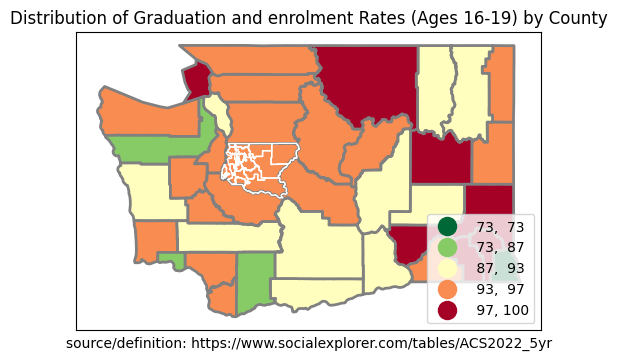

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
county=county.to_crs(wac2b.crs)

wac2b.plot(ax=ax,column='Grad Per Capita',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
#leg1.set_title('''white color=Lake''')
ax.title.set_text("Distribution of Graduation and enrolment Rates (Ages 16-19) by County")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: https://www.socialexplorer.com/tables/ACS2022_5yr''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as
county.plot(ax=ax, color='none', edgecolor='white')

In [ ]:
!pip install pandas
import pandas as pd

kingcclasslevel=pd.read_csv('https://github.com/Spontyrupple/mamaine/raw/refs/heads/main/School%20enrolment.csv')


In [ ]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O kingcounty.zip https://docs.google.com/uc?id=1oZr6tGskrK9bh1Fcnr7YR4CGurSMcOAT&export=download

zip_ref = zipfile.ZipFile('kingcounty.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
kingc1=gpd.read_file('School_Districts_in_King_County___schdst_area.shp') #load the shapefile with gpd as njC

In [ ]:
kingcclasslevel['NAME']=kingcclasslevel ['Geo_QName'].str.replace(' School District, Washington','')

In [ ]:
# Now perform the merge
kingc1 = pd.merge(kingc1, kingcclasslevel, on='NAME',how='outer',indicator=True)
kingc1[['NAME','SE_A12006_002','SE_A12006_003','SE_A12006_004','SE_A12006_005','_merge']]

,NAME,SE_A12006_002,SE_A12006_003,SE_A12006_004,SE_A12006_005,_merge
0,Auburn,21203,762,11175,5088,both
1,Bellevue,25313,702,11968,6710,both
2,Enumclaw,5040,145,2890,1274,both
3,Federal Way,29685,1112,14627,8023,both
4,Fife,4304,126,2110,1190,both
5,Highline,25762,664,13446,5944,both
6,Issaquah,25227,482,13334,7409,both
7,Kent,38007,1555,20115,8261,both
8,Lake Washington,40972,922,21797,9300,both
9,Mercer Island,5335,132,2664,1752,both


<Axes: >

Text(0.5, 1.0, 'Students Enrolled in Public Schools')

[]

[]

<Axes: >

Text(0.5, 1.0, 'Students Enrolled in Pre-School')

[]

[]

<Axes: >

Text(0.5, 1.0, 'Students Enrolled in K-8')

[]

[]

<Axes: >

Text(0.5, 1.0, 'Students Enrolled in 9-12')

[]

[]

Text(0.5, 0.98, 'King County Student Population Overview')

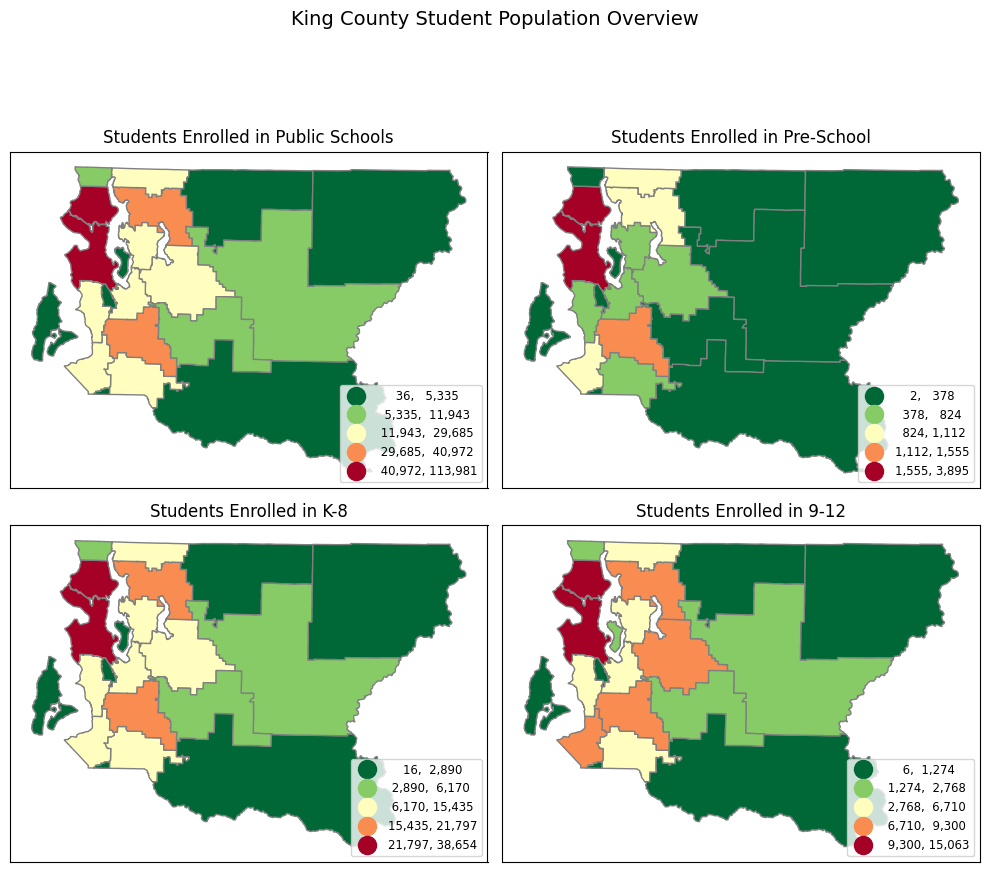

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharey=True, tight_layout=True)

# Top-left subplot
kingc1.plot(ax=axs[0, 0], column='SE_A12006_002', legend=True, cmap='RdYlGn_r',
           scheme='natural_breaks', k=5, edgecolor='grey', linewidth=1,
         legend_kwds={"fmt": "{:,.0f}", 'loc':'lower right',
                       'title_fontsize':'medium', 'fontsize':'small',
                       'markerscale':1.4})
axs[0, 0].set_title("Students Enrolled in Public Schools")
axs[0, 0].set_xticks([]); axs[0, 0].set_yticks([])

# Top-right subplot
kingc1.plot(ax=axs[0, 1], column='SE_A12006_003', legend=True, cmap='RdYlGn_r',
         scheme='natural_breaks', k=5, edgecolor='grey', linewidth=1,
         legend_kwds={"fmt": "{:,.0f}", 'loc':'lower right',
                       'title_fontsize':'medium', 'fontsize':'small',
                       'markerscale':1.4})
axs[0, 1].set_title("Students Enrolled in Pre-School")
axs[0, 1].set_xticks([]); axs[0, 1].set_yticks([])

# Bottom-left subplot
kingc1.plot(ax=axs[1, 0], column='SE_A12006_004', legend=True, cmap='RdYlGn_r',
         scheme='natural_breaks', k=5, edgecolor='grey', linewidth=1,
         legend_kwds={"fmt": "{:,.0f}", 'loc':'lower right',
                       'title_fontsize':'medium', 'fontsize':'small',
                       'markerscale':1.4})
axs[1, 0].set_title("Students Enrolled in K-8")
axs[1, 0].set_xticks([]); axs[1, 0].set_yticks([])

# Bottom-right subplot
kingc1.plot(ax=axs[1, 1], column='SE_A12006_005', legend=True, cmap='RdYlGn_r',
         scheme='natural_breaks', k=5, edgecolor='grey', linewidth=1,
         legend_kwds={"fmt": "{:,.0f}", 'loc':'lower right',
                       'title_fontsize':'medium', 'fontsize':'small',
                       'markerscale':1.4})
axs[1, 1].set_title("Students Enrolled in 9-12")
axs[1, 1].set_xticks([]); axs[1, 1].set_yticks([])

fig.suptitle('King County Student Population Overview', fontsize=14)

plt.show()



Seattle Public Schools District is the largest school district in King County by student population.

In [ ]:
seissues=pd.read_csv('https://github.com/Spontyrupple/mamaine/raw/refs/heads/main/R13744941_SL970%20final.csv')

In [ ]:
seissues['NAME']=seissues ['Geo_NAME'].str.replace(' School District','')

In [ ]:
studenth=pd.read_csv('https://github.com/Spontyrupple/mamaine/raw/refs/heads/main/2018%20Homelessness.csv')

In [ ]:
studenth['NAME']=studenth ['Unnamed: 2'].str.replace(' School District','')

In [ ]:
kingc2=gpd.read_file('School_Districts_in_King_County___schdst_area.shp') #load the shapefile with gpd as
kingc3=gpd.read_file('School_Districts_in_King_County___schdst_area.shp') #load the shapefile with gpd as njC

In [ ]:
kingc2 = pd.merge(kingc2, studenth, on='NAME',how='outer',indicator=True)
kingc2[['NAME','Percentage','_merge']]


,NAME,Percentage,_merge
0,Aberdeen,5.9,right_only
1,Adna,2.7,right_only
2,Almira,0.0,right_only
3,Anacortes,1.5,right_only
4,Arlington,3.8,right_only
...,...,...,...
321,Yelm,1.8,right_only
322,Zillah,2.6,right_only
323,NaN,NaN,right_only
324,NaN,NaN,right_only


In [ ]:
kingc2 = kingc2.query('_merge == "both"')

In [ ]:
kingc3 = pd.merge(kingc3, seissues, on='NAME',how='outer',indicator=True)
kingc3[['NAME','Drop out rate','Under 18 living in poverty','SE_A14024_001','_merge']]

,NAME,Drop out rate,Under 18 living in poverty,SE_A14024_001,_merge
0,Auburn,9.0,10.1,40731,both
1,Bainbridge Island,7.0,1.0,86747,right_only
2,Bellevue,0.2,7.4,89964,both
3,Enumclaw,5.2,6.0,55882,both
4,Federal Way,3.4,19.0,39337,both
5,Fife,12.9,11.1,42028,both
6,Highline,7.9,16.6,43156,both
7,Issaquah,1.0,5.2,82702,both
8,Kent,4.5,12.5,44898,both
9,Lake Washington,1.9,4.7,83608,both


<Axes: >

Text(0.5, 1.0, '% of enroled students experiencing homelessness pk-12')

[]

[]

Text(0.5, 24.140624999999986, 'source/definition: https://ospi.k12.wa.us')

<Axes: >

Text(0.5, 1.0, '18 years old and below living in poverty')

[]

[]

<Axes: >

Text(0.5, 1.0, 'Per capita income')

[]

[]

<Axes: >

Text(0.5, 1.0, 'Drop out rate')

[]

[]

Text(0.5, 0.98, 'Who is more affected?')

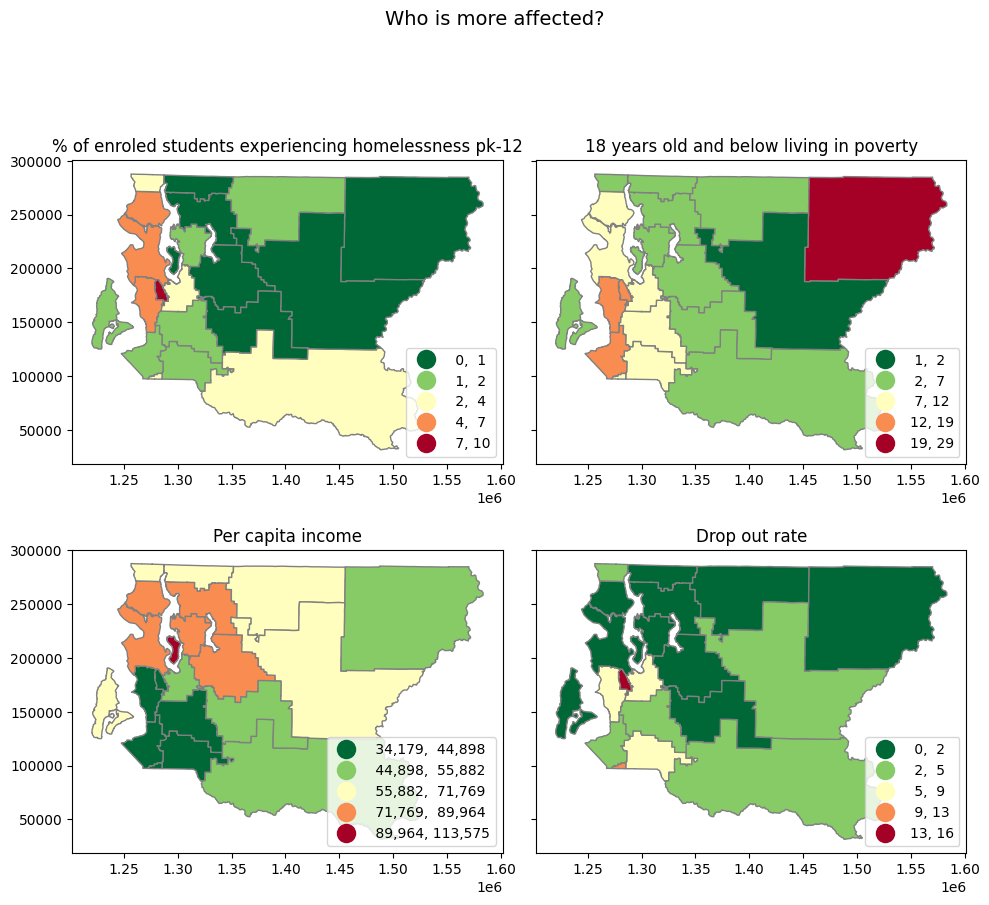

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharey=True, tight_layout=True)

# Top-left subplot
kingc2.plot(ax=axs [0,0],column='Percentage',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
#leg1.set_title('''white color=Lake''')
axs[0, 0].set_title("% of enroled students experiencing homelessness pk-12")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: https://ospi.k12.wa.us''')

# Top-right subplot
kingc3.plot(ax=axs [0,1],column='Under 18 living in poverty',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
#leg1.set_title('''white color=Lake''')
axs[0, 1].set_title("18 years old and below living in poverty")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.set_xlabel('''source/definition: https://ospi.k12.wa.us''')

# Bottom-left subplot
kingc3.plot(ax=axs [1, 0],column='SE_A14024_001',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
#leg1.set_title('''white color=Lake''')
axs[1, 0].set_title("Per capita income")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.set_xlabel('''source/definition: https://ospi.k12.wa.us''')


# Bottom-right subplot
kingc3.plot(ax=axs [1, 1],column='Drop out rate',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
#leg1.set_title('''white color=Lake''')
axs[1, 1].set_title("Drop out rate")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.set_xlabel('''source/definition: https://ospi.k12.wa.us''')

fig.suptitle('Who is more affected?', fontsize=14)

plt.show()



Tukwila School District has the highest percentage of students experiencing homelessness, a relatively high number of children aged 18 years and below who are living in poverty, one of the lowest per capita income, and the highest drop out rate. Riverview has the highest number of children living in poverty, but it has one of the lowest drop out rates. Mercer Island appears to be the opposite of Tukwila with low levels of homelessness and poverty, the highest per capita income and one of the lowest drop out rates.

In [ ]:
! wget -q -O School_Sites_in_King_County___schsite_point.zip https://github.com/Spontyrupple/mamaine/raw/refs/heads/main/School_Sites_in_King_County___schsite_point.zip

import zipfile
zip_ref = zipfile.ZipFile('School_Sites_in_King_County___schsite_point.zip', 'r')
zip_ref.extractall()
zip_ref.close() #just unzipping
import geopandas as gpd
kingsch=gpd.read_file('School_Sites_in_King_County___schsite_point.shp')

In [ ]:
kingsch.head(200)

,OBJECTID,FEATURE_ID,ESITE,CODE,FEATUREDES,NAME,ABB_NAME,ADDRESS,ZIPCODE,LONG_CEN,LAT_CEN,OSPI_CODE,SCH_CLASS,DISTRICT,PIN,MAJOR,MINOR,geometry
0,1,6600372,12188,665,School-Other Facility,Transportation/Maintenance,Transportation/Maintenance,420 Park Ave N,98057,-122.201843,47.488970,0.0,10,RENTON,7564600105,756460,0105,POINT (1302082 181371)
1,2,1130,12392,660,School-Elementary,Christ the King School,Christ the King,415 N 117th St,98133,-122.353529,47.713915,0.0,20,SEATTLE,6140100225,614010,0225,POINT (1266206 264111)
2,3,6600382,392659,661,School-Junior High/Middle,Thunder Mountain Middle School,Thunder Mountain,42018 264th Ave SE,98022,-121.987513,47.223103,4550.0,10,ENUMCLAW,1320069010,132006,9010,POINT (1353612 83534)
3,4,654,12138,660,School-Elementary,Louisa May Alcott School,Alcott,4213 228th Ave NE,98053,-122.037561,47.646720,0.0,10,LAKE WASHINGTON,1625069113,162506,9113,POINT (1343594 238227)
4,5,231,2409,660,School-Elementary,Sunset Elementary School,Sunset,4229 W Lake Sammamish Pkwy SE,98008,-122.101634,47.568792,3228.0,10,ISSAQUAH,1324059064,132405,9064,POINT (1327334 210059)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,260,109,661,School-Junior High/Middle,Northshore Middle School,Northshore,12101 NE 160th St,98011,-122.179812,47.743150,4021.0,10,NORTHSHORE,1626059131,162605,9131,POINT (1309150 273977)
196,197,632,568136,662,School-High,Redmond High School,Redmond High,17272 NE 104th St,98052,-122.106418,47.694919,3528.0,10,LAKE WASHINGTON,3626059014,362605,9014,POINT (1326914 256079)
197,198,1156,16155,662,School-High,Shorewood High School,Shorewood,17300 Fremont Ave N,98133,-122.348288,47.755134,3921.0,10,SHORELINE,0726049134,072604,9134,POINT (1267792 279118)
198,199,1157,184012,664,School-Alternative,St. Luke School,St. Luke,17533 Saint Luke Pl N,98133,-122.353653,47.756725,0.0,20,SHORELINE,6190700150,619070,0150,POINT (1266484 279724)


In [ ]:
awardedking=pd.read_csv('https://github.com/Spontyrupple/mamaine/raw/refs/heads/main/Report_Card_1003_Funds_2022-23_School_Year_20241011.csv')
awardedking.rename(columns={'School Name': 'NAME'}, inplace=True)

In [ ]:
kingawards = pd.merge(kingsch, awardedking, on='NAME',how='outer',indicator=True)
kingawards[['NAME','1003 Award','_merge']]

,NAME,1003 Award,_merge
0,Abraham Lincoln Elementary School,75855.0,right_only
1,Acceleration Academy,75855.0,right_only
2,Adams Elementary School,75855.0,both
3,Adams Elementary School,75855.0,both
4,Adelaide Elementary School,NaN,left_only
...,...,...,...
809,Woodmont K-8 School,NaN,left_only
810,Woodmoor Elementary School,NaN,left_only
811,Woodridge Elementary School,NaN,left_only
812,Yakima Online,65275.0,right_only


<Axes: >

[]

[]

Text(0.5, 214.0910840409286, 'source/definition: https://ospi.k12.wa.us/student-success')

<Axes: title={'center': 'Schools that received 1003 funds in 2022/23, (schools in most impacted district not beneficiaries)'}, xlabel='source/definition: https://ospi.k12.wa.us/student-success'>

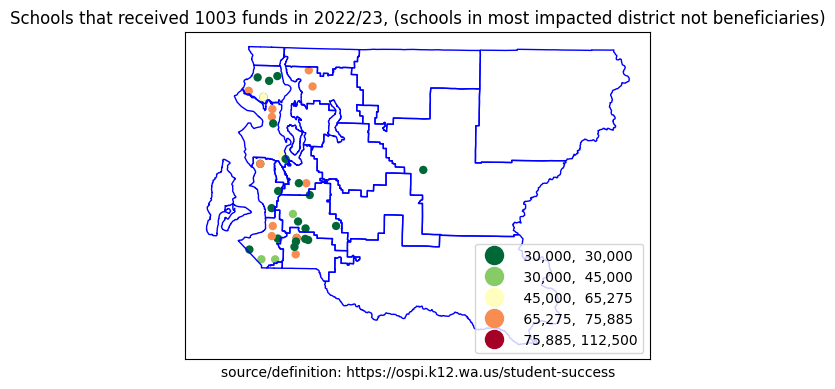

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
county=county.to_crs(kingawards.crs)
#wac=wac.to_crs(wac2b.crs)
kingawards.plot(ax=ax,column='1003 Award',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=0.001,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
#leg1.set_title('''white color=Lake''')
ax.title.set_text("Schools that received 1003 funds in 2022/23, (schools in most impacted district not beneficiaries)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: https://ospi.k12.wa.us/student-success''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as
county.plot(ax=ax, color='none', edgecolor='blue')
#wac.plot(ax=ax, color='none', edgecolor='blue')

Even though Tukwila is the most affected by socio-economic issues that King County recognises to have impact on student success, schools in Tukwila school Districts did not receive 1003 Funds. Tukwila school Distrct is where the highest need for targeted interventions to improve student success is.Federal Way School District emerges as the biggest beneficiary of 1003 Funds. Schools in the district received a total of 23,762USD followed by Auburn School District which received 336985. Both Federal Way and Auburn have drop out rates significantly lower than Tukwila's.

**Data Sources**

https://gis-kingcounty.opendata.arcgis.com/datasets/bace62518e9e4b5fbd6dfc386380d417/explore
https://reportcard.ospi.k12.wa.us/ReportCard/ViewSchoolOrDistrict/103300
https://www.kuow.org/stories/new-test-scores-show-50-of-wa-students-are-reading-at-grade-level
https://data.kingcounty.gov/County-Operations/EGP-Nonprofits/4wxy-htkj/about_data
https://geo.wa.gov/datasets/12712f465fc44fb58328c6e0255ca27e_11/explore
https://www.socialexplorer.com/tables/ACS2022_5yr